# House price prediction

The aim of this notebook is to provide a base code presenting best practices for Data Analysis, Data preprocessing, Machine Learning Pipelines and Model Selection. We use the famous kaggle house prices dataset to illustrate these concepts.

The outline of the Notebook is as follows:

* 1. Loading the data
* 2. Data Visualization - Univariate Analysis
* 3. Data Visualization - Bivariate Analysis
* 4. Machine Learning Pipelines and Model Selection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_columns', None)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/data_description.txt


## 1. Loading the data

We start by loading the training data (i.e. data for which we have labels). Then we drop the samples for which we do not have the target value.

In [2]:
DATA_DIR = os.path.abspath('../input/home-data-for-ml-course/')
TRAIN_DIR = os.path.join(DATA_DIR, 'train.csv')
TEST_DIR = os.path.join(DATA_DIR, 'test.csv')

housing = pd.read_csv(TRAIN_DIR, index_col = 'Id')

housing = housing.dropna(subset = ['SalePrice'])
housing['SalePrice'] = np.log1p(housing['SalePrice'])

In [3]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


We would like to know which features have missing values the most. Then we are going to drop those where more than 40% of the data is unavailable

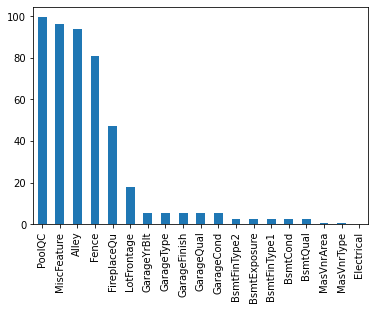

In [4]:
missing = housing.isnull().mean()*100
missing = missing[missing>0].sort_values(ascending = False)
missing.plot.bar()

In [5]:
# drop columns where more than 40% of data is unavailable
cols_to_drop = [column for column in list(housing) if housing[column].isnull().mean() > 0.4]
housing = housing.drop(cols_to_drop, axis = 1)

## 2. Univariate Analysis

Before going any further, we start by splitting the training data into a training set and a validation set.
Categorical and numerical features have different characteristics. Thus, we'll perform different visualizations and analysis for each. 

In [6]:
from sklearn.model_selection import train_test_split

housing_train, housing_valid = train_test_split(housing, random_state = 42)

# list of categorical feature names
attr_cat = [column for column in list(housing_train) if (housing_train[column].dtype == 'object' and column != 'SalePrice')]

# list of numerical feature names
attr_num = [column for column in list(housing_train) if (housing_train[column].dtype in ['int64', 'float64'] and column != 'SalePrice')]

### 2.1. Analysing categorical features

The way to go when it comes to visualizing categorical data is to perform count plots and see how each category is distributed.
As you will see in the plots below, some of the categorical features do not provide useful information since their entries belong predominantly to one category.
Those features are dropped.

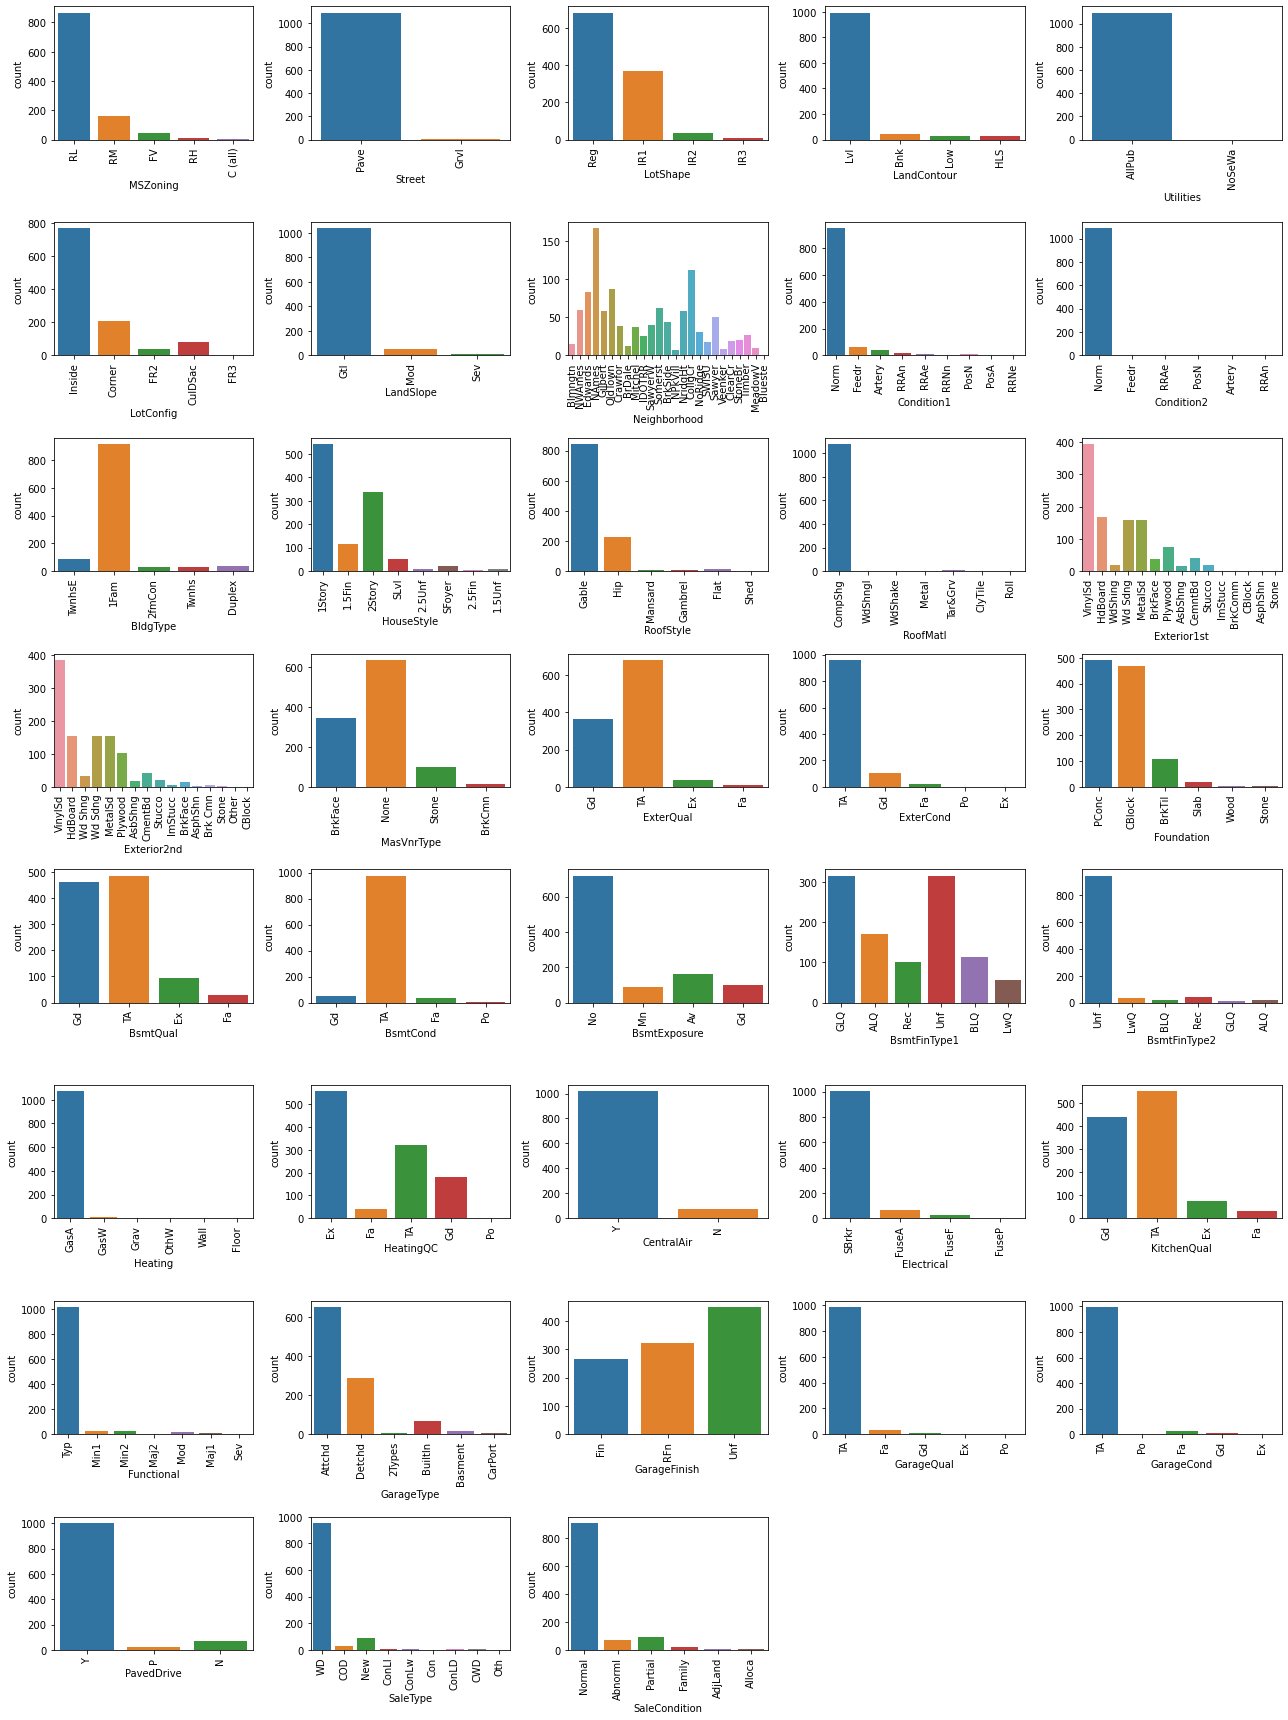

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(18,24))
for i, attr in enumerate(attr_cat):
    fig.add_subplot(8,5,i+1)
    sns.countplot(housing_train[attr])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
cat_to_drop = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical', 'CentralAir', 'Heating', 'BsmtFinType2', 'BsmtCond','ExterCond']

housing_train = housing_train.drop(cat_to_drop, axis = 1)
attr_cat = list(set(attr_cat) - set(cat_to_drop))

### 2.2. Analysing numerical features

Visualizing distributions for numerical features is essential. A lot of Machine Learning models assume that features have a gaussian distributions. On the other hand, ensembling methods such as RandomForests and XGBoost are not sensitive to that assumption. Many numerical features do not provide useful insight about the data. Those features are either capped to a max(or min) value or have an almost constant value. They will be deleted.

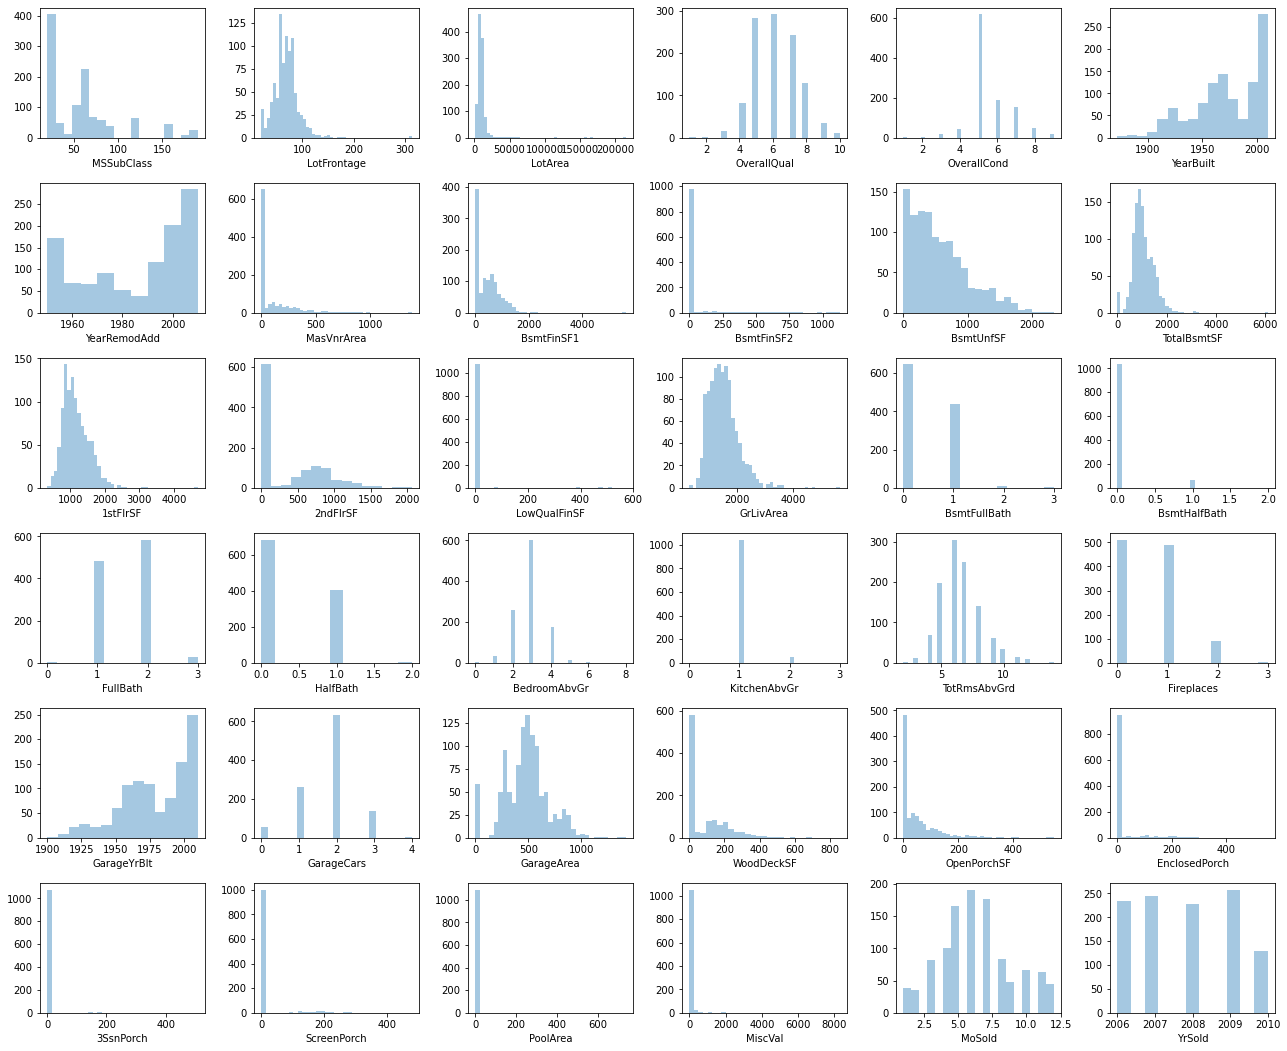

In [9]:
fig = plt.figure(figsize=(18,24))
for i, attr in enumerate(attr_num):
    fig.add_subplot(10,6,i+1)
    sns.distplot(housing_train[attr], kde=False)
plt.tight_layout()
plt.show()

In [10]:
num_to_drop = ['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFinSF2']

housing_train = housing_train.drop(num_to_drop, axis = 1)
attr_num = list(set(attr_num) - set(num_to_drop))

Boxplot allow us to have a better idea about the presence of outliers and how badly they may affect our predictions later.

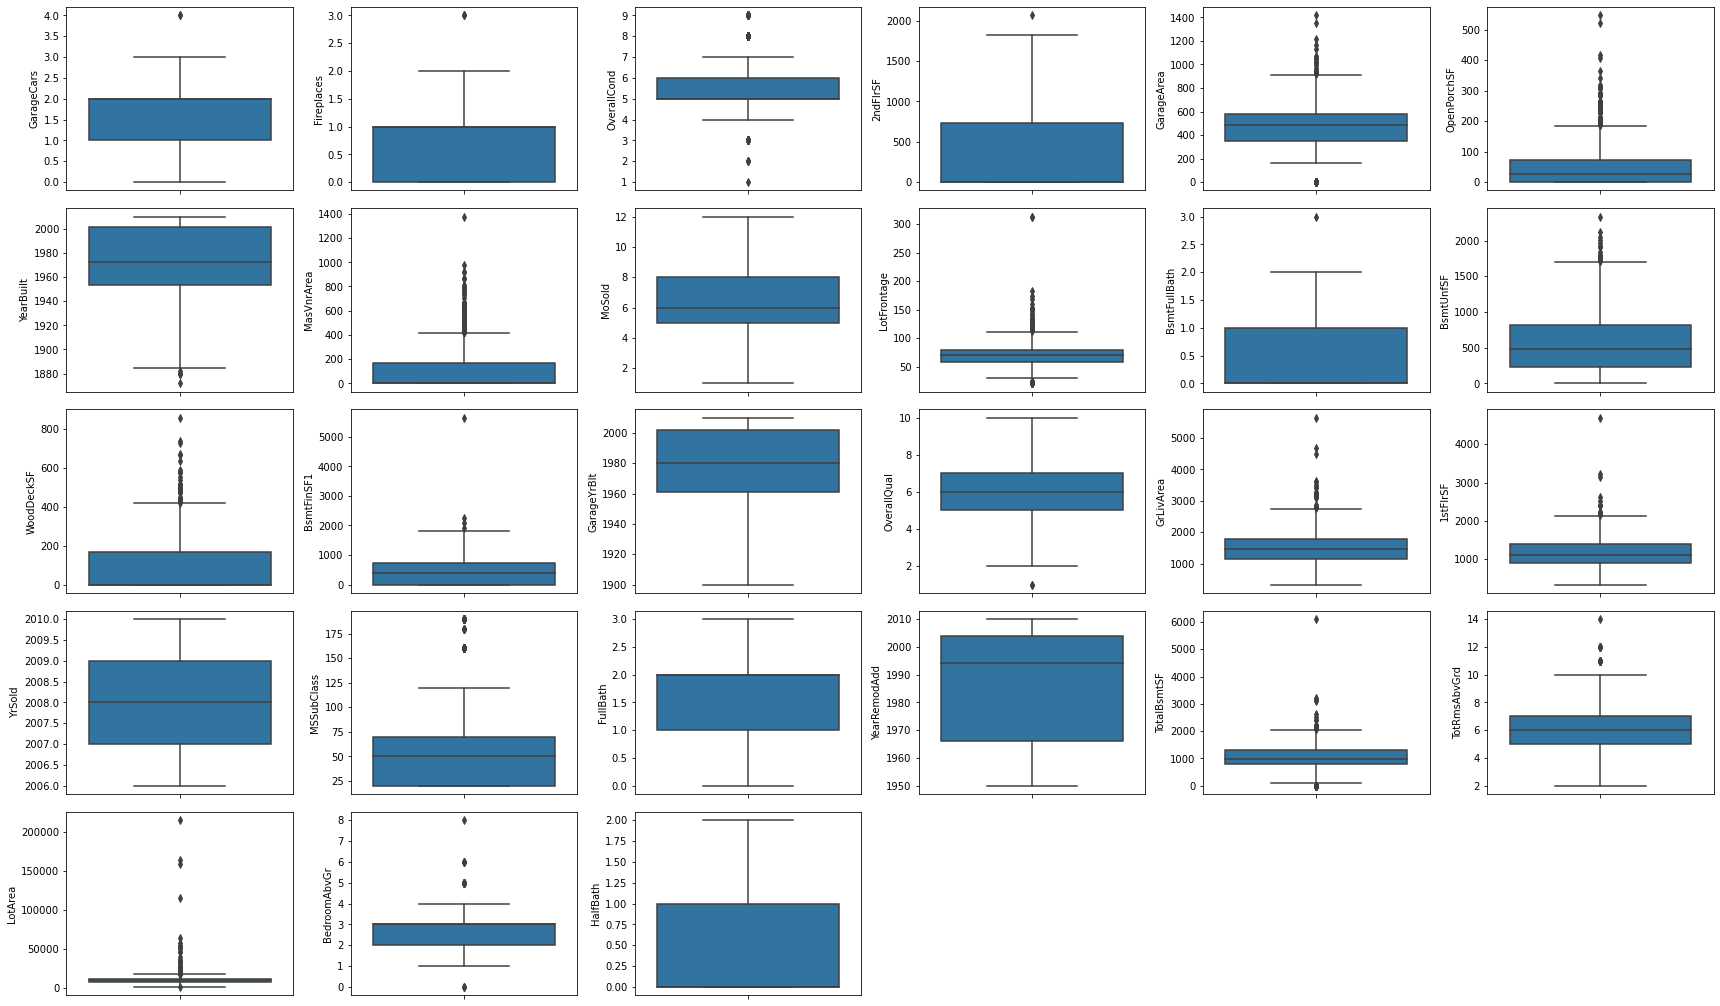

In [11]:
fig = plt.figure(figsize=(24,28))
for i, attr in enumerate(attr_num):
    fig.add_subplot(10,6,i+1)
    sns.boxplot(y = housing_train[attr])
plt.tight_layout()
plt.show()

List of columns with too many outliers

- LotArea
- OpenPorchSF
- WoodDeckSF
- BsmtUnfSF
- BsmtFinSF1
- LotFrontage
- GarageArea
- TotalBsmtSF
- GlivArea
- MasVnrArea

In [12]:
attr_num_out = ['LotArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtUnfSF', 'BsmtFinSF1', 'LotFrontage', 'GarageArea', 'TotalBsmtSF', 'GrLivArea','MasVnrArea']
housing_train[attr_num_out].describe()

,LotArea,OpenPorchSF,WoodDeckSF,BsmtUnfSF,BsmtFinSF1,LotFrontage,GarageArea,TotalBsmtSF,GrLivArea,MasVnrArea
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,895.000000,1095.000000,1095.00000,1095.000000,1091.000000
mean,10747.046575,49.633790,96.194521,568.794521,448.178082,70.394413,477.539726,1060.76347,1531.213699,103.368469
std,11065.878057,69.134174,130.396336,444.865511,457.898505,25.219301,210.563755,443.87948,527.197908,171.644715
min,1300.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.00000,334.000000,0.000000
25%,7589.000000,0.000000,0.000000,221.500000,0.000000,59.000000,349.500000,795.50000,1148.000000,0.000000
50%,9600.000000,27.000000,0.000000,474.000000,387.000000,70.000000,484.000000,996.00000,1478.000000,0.000000
75%,11700.000000,74.000000,168.000000,810.500000,724.000000,80.000000,576.000000,1299.50000,1795.000000,166.000000
max,215245.000000,547.000000,857.000000,2336.000000,5644.000000,313.000000,1418.000000,6110.00000,5642.000000,1378.000000


In [13]:
housing_train = housing_train.drop(housing_train[housing_train['LotArea']>25000].index)
housing_train = housing_train.drop(housing_train[housing_train['OpenPorchSF']>150].index)
housing_train = housing_train.drop(housing_train[housing_train['WoodDeckSF']>400].index)
housing_train = housing_train.drop(housing_train[housing_train['BsmtUnfSF']>1600].index)
housing_train = housing_train.drop(housing_train[housing_train['BsmtFinSF1']>1400].index)
housing_train = housing_train.drop(housing_train[housing_train['LotFrontage']>160].index)
housing_train = housing_train.drop(housing_train[housing_train['GarageArea']>1200].index)
housing_train = housing_train.drop(housing_train[housing_train['TotalBsmtSF']>2600].index)
housing_train = housing_train.drop(housing_train[housing_train['GrLivArea']>3600].index)
housing_train = housing_train.drop(housing_train[housing_train['MasVnrArea']>320].index)

## 3. Bivariate Analysis

### 3.1. Correlation Matrix

Correlation matrices allow to visually inspect possible correlations between features. If correlation exists, it may be wise to keep only one of the correlated features. This will help us avoid overfitting and have a lighter model later for the machine learning part.

**Caution :** Correlation matrix won't help us detect non-linear or multi-variate feature relations though.

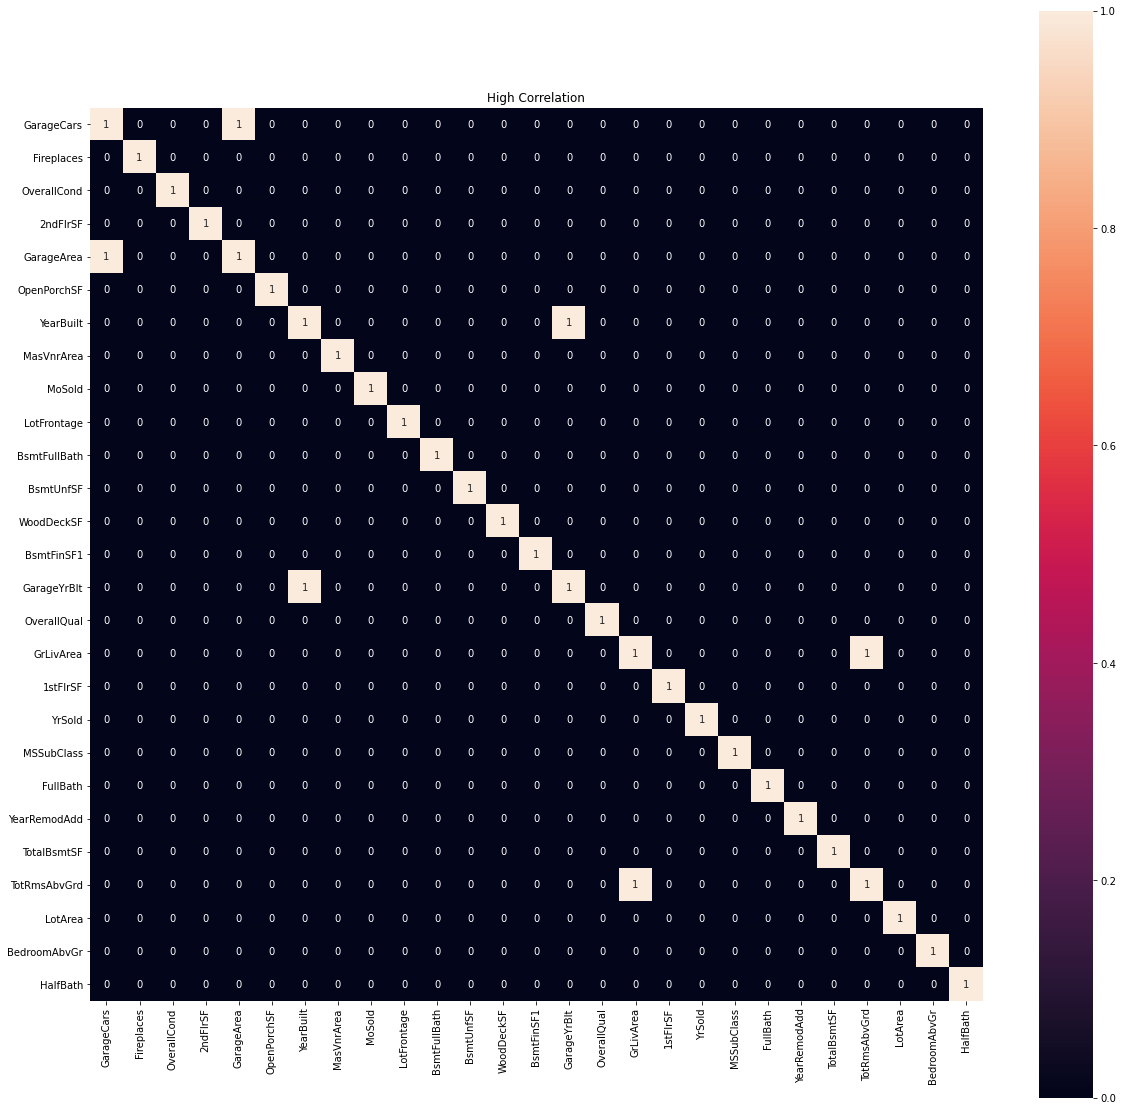

In [14]:
num_correlation = housing_train[attr_num].corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

In [15]:
attr_num_corr = ['GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt']
housing_train = housing_train.drop(attr_num_corr, axis = 1)
attr_num = list(set(attr_num) - set(attr_num_corr))

### 3.2. Scatter plot

<Figure size 1440x1440 with 0 Axes>

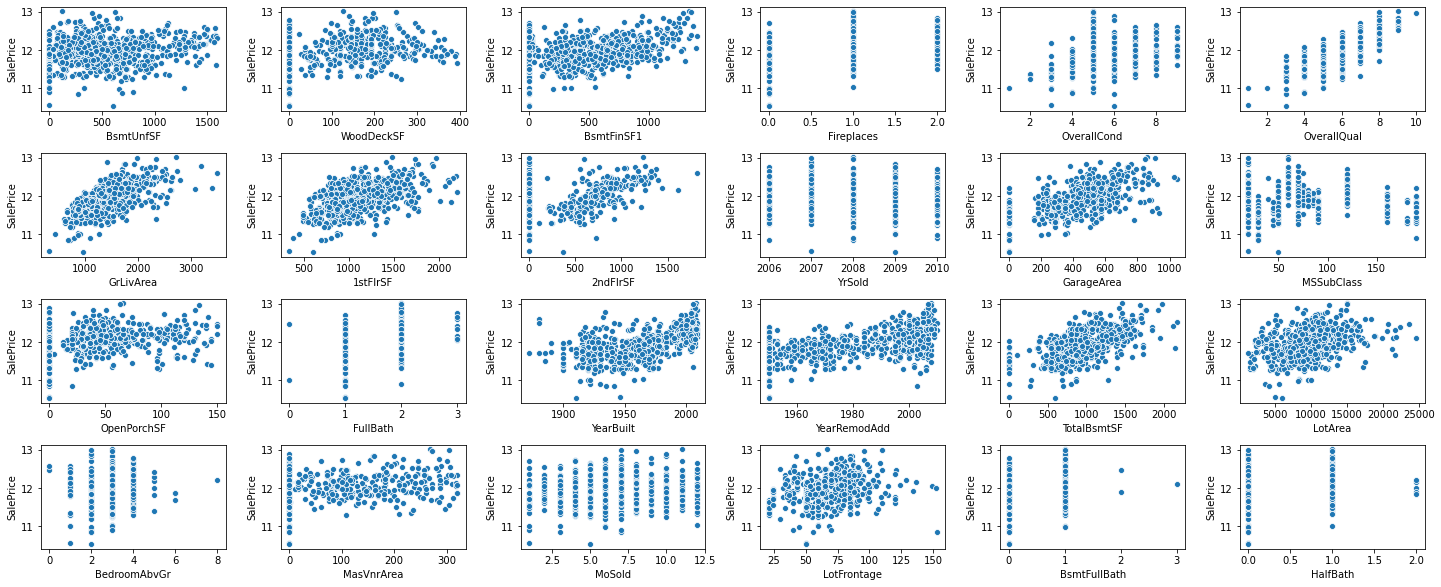

In [16]:
plt.figure(figsize=(20,20))

fig = plt.figure(figsize=(20,20))
for i, attr in enumerate(attr_num):
    fig.add_subplot(10,6,i+1)
    sns.scatterplot(x = attr, y = 'SalePrice', data = housing_train)
plt.tight_layout()
plt.show()


## 4. Modeling

Numerical and Categorical Features are processed differently. We will create a tranformation pipeline for each. Then we are going to merge the pipelines using sklearn's ColumnTransformer. After that, we fit our transformed data to an XGBRegressor to have the feature importances.

In [17]:
## 1 - categorical pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])


## 2 - numerical pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scale', StandardScaler()),
])


## whole preprocessing pipeline

from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, attr_cat),
    ('num', num_pipeline, attr_num)
])

# having feature importances by fitting a basic XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

xgb_reg = XGBRegressor(n_jobs = -1, random_state = 123)


# X_train, y_train, X_valid, y_valid

attr = attr_cat + attr_num

X_train = housing_train[attr]
y_train = housing_train['SalePrice']
X_valid = housing_valid[attr]
y_valid = housing_valid['SalePrice']

X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_valid_preprocessed = preprocessing_pipeline.transform(X_valid)


xgb_reg.fit(X_train_preprocessed, y_train)

feature_importances = xgb_reg.feature_importances_

from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In the last part of the code above, we have created a custom transformer. It has mainly two parameters :

* feature_importances array
* k an integer

This transformer keeps the top-k most important features based on the feature_importances array. This will help us have a lighter model and protect us from overfitting.

**Whole pipeline with estimator included**

In [18]:
# Creating whole pipeline by adding feature selection to the pipeline

estimator = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k=20)),
    ('inference', xgb_reg)
])

# preprocessing parameter grid
param_dist = {'strategy': ['most_frequent', 'median', 'mean']
             }

preprocessing_param_grid = {'preprocessing__num__impute__'+k:v for k,v in param_dist.items()}


# feature selection parameter grid
param_dist = {'k': stats.randint(10, 30),
             }

feature_selection_param_grid = {'feature_selection__'+k:v for k,v in param_dist.items()}


# inference parameter grid
param_dist = {'n_estimators': stats.randint(1000, 4000),
              'learning_rate': stats.expon(0.005, 0.1),
             }

inference_param_grid = {'inference__'+k:v for k,v in param_dist.items()}

param_grid = {**preprocessing_param_grid, **feature_selection_param_grid, **inference_param_grid}

estimator_opt = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,n_iter = 50, scoring = 'neg_mean_absolute_error', cv = 5, random_state = 123, return_train_score = True)


estimator_opt.fit(X_train, y_train)
preds = estimator_opt.predict(X_valid)

from sklearn.metrics import mean_squared_error

## Inference on test set

X_test = pd.read_csv(TEST_DIR, index_col = 'Id')

test_preds = estimator_opt.predict(X_test)

submission = pd.DataFrame({'Id': X_test.index , 'SalePrice' : np.exp(test_preds)})

submission.to_csv('submission.csv', index = False)

/opt/conda/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
